In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

pd.options.display.max_columns=999
pd.options.display.max_rows=999
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
week1 = pd.read_csv("nfl-big-data-bowl-2021/week1.csv")
week1.head(25)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH
5,2018-09-07T01:07:14.599Z,73.64,28.70,0.03,0.02,0.01,103.05,219.41,None,2534832.0,Rodney McLeod,23.0,FS,1,home,2018090600,75,left,NaN
6,2018-09-07T01:07:14.599Z,98.25,26.63,0.01,0.01,0.00,265.88,194.51,None,2543583.0,Devonta Freeman,24.0,RB,1,away,2018090600,75,left,NaN
7,2018-09-07T01:07:14.599Z,86.48,31.12,0.09,0.03,0.04,95.90,33.36,None,2552315.0,Jordan Hicks,58.0,MLB,1,home,2018090600,75,left,NaN
8,2018-09-07T01:07:14.599Z,82.67,20.53,0.03,0.07,0.01,81.14,174.57,None,2552689.0,Ronald Darby,21.0,CB,1,home,2018090600,75,left,NaN
9,2018-09-07T01:07:14.599Z,84.00,43.49,0.14,0.05,0.01,108.23,110.32,None,2555383.0,Jalen Mills,31.0,CB,1,home,2018090600,75,left,NaN


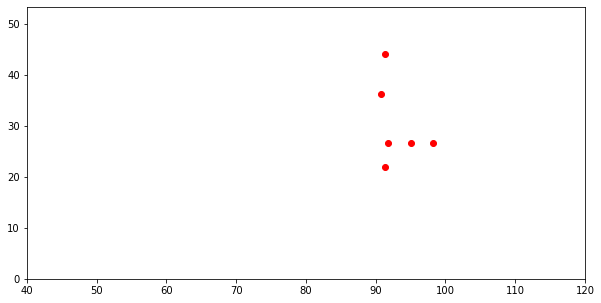

In [189]:
play1 = week1[week1["playId"] == 75]

off_pos = ["QB", "WR", "RB", "FB", "TE"]
def_pos = ["CB", "MLB", "SS", "FS"]

play1_off = play1[play1["position"].isin(off_pos)].reset_index().drop(columns=['index'])
play1_def = play1[play1["position"].isin(def_pos)].reset_index().drop(columns=['index'])
football = play1[play1["position"].isna()].reset_index().drop(columns=['index'])

off = np.array(np.zeros((int(len(play1_off)/6), 6, 2)))
for i in range(int(len(play1_off)/6)):
    for k in range(6):
        off[i][k][0] = play1_off["x"][(i*6)+k]
        off[i][k][1] = play1_off["y"][(i*6)+k]
off_colors = np.full((int(len(play1_off)/6), 6, 2), ['r'], dtype=str)

defe = np.array(np.zeros((int(len(play1_def)/7), 7, 2)))
for i in range(int(len(play1_def)/7)):
    for k in range(7):
        defe[i][k][0] = play1_def["x"][(i*7)+k]
        defe[i][k][1] = play1_def["y"][(i*7)+k]
defe_colors = np.full((int(len(play1_def)/7), 7, 2), ['g'], dtype=str)

fig, ax = plt.subplots(figsize=(10,5))
ax.set(xlim=(40,120), ylim=(0,53.3))

scat = ax.scatter(off[0][0], off[1][0], color='red')
#scat = ax.scatter(defe[0][0], defe[1][0], color='lightgreen')

def animate(i):
    scat.set_offsets(off[i])

anim = FuncAnimation(
    fig, animate, interval=100, frames=len(off)-1)
 
plt.draw()
plt.show()

anim.save('play1_off.mp4')

In [183]:
matt_ryan = play1[play1["displayName"] == "Matt Ryan"].reset_index()
#matt_ryan["time"][1] - matt_ryan["time"][0]

diff = np.zeros(len(matt_ryan["time"])-1)
for i in range(1, len(matt_ryan["time"])):
    diff[i-1] = float(matt_ryan["time"][i][17:-1]) - float(matt_ryan["time"][i-1][17:-1])

diff.mean()

0.10001724137931031

In [195]:
off_colors = np.full((int(len(play1_off)/6), 6, 2), ['r'], dtype=str)
colors[0]

array([['r', 'r'],
       ['r', 'r'],
       ['r', 'r'],
       ['r', 'r'],
       ['r', 'r'],
       ['r', 'r']], dtype='<U1')

In [319]:
week1 = pd.read_csv("nfl-big-data-bowl-2021/week1.csv")
week2 = pd.read_csv("nfl-big-data-bowl-2021/week2.csv")
week3 = pd.read_csv("nfl-big-data-bowl-2021/week3.csv")
week4 = pd.read_csv("nfl-big-data-bowl-2021/week4.csv")
week5 = pd.read_csv("nfl-big-data-bowl-2021/week5.csv")
week6 = pd.read_csv("nfl-big-data-bowl-2021/week6.csv")
week7 = pd.read_csv("nfl-big-data-bowl-2021/week7.csv")
week8 = pd.read_csv("nfl-big-data-bowl-2021/week8.csv")
week9 = pd.read_csv("nfl-big-data-bowl-2021/week9.csv")
week10 = pd.read_csv("nfl-big-data-bowl-2021/week10.csv")
week11 = pd.read_csv("nfl-big-data-bowl-2021/week11.csv")
week12 = pd.read_csv("nfl-big-data-bowl-2021/week12.csv")
week13 = pd.read_csv("nfl-big-data-bowl-2021/week13.csv")
week14 = pd.read_csv("nfl-big-data-bowl-2021/week14.csv")
week15 = pd.read_csv("nfl-big-data-bowl-2021/week15.csv")
week16 = pd.read_csv("nfl-big-data-bowl-2021/week16.csv")
week17 = pd.read_csv("nfl-big-data-bowl-2021/week17.csv")


all_data = pd.concat([week1,
                      week2,
                      week3,
                      week4,
                      week5,
                      week6,
                      week7,
                      week8,
                      week9,
                      week10,
                      week11,
                      week12,
                      week13,
                      week14,
                      week15,
                      week16,
                      week17])
all_data = all_data.reset_index().drop(columns=['index'])
len(all_data)

18309388

In [320]:
all_data.head(15)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH
5,2018-09-07T01:07:14.599Z,73.64,28.70,0.03,0.02,0.01,103.05,219.41,None,2534832.0,Rodney McLeod,23.0,FS,1,home,2018090600,75,left,NaN
6,2018-09-07T01:07:14.599Z,98.25,26.63,0.01,0.01,0.00,265.88,194.51,None,2543583.0,Devonta Freeman,24.0,RB,1,away,2018090600,75,left,NaN
7,2018-09-07T01:07:14.599Z,86.48,31.12,0.09,0.03,0.04,95.90,33.36,None,2552315.0,Jordan Hicks,58.0,MLB,1,home,2018090600,75,left,NaN
8,2018-09-07T01:07:14.599Z,82.67,20.53,0.03,0.07,0.01,81.14,174.57,None,2552689.0,Ronald Darby,21.0,CB,1,home,2018090600,75,left,NaN
9,2018-09-07T01:07:14.599Z,84.00,43.49,0.14,0.05,0.01,108.23,110.32,None,2555383.0,Jalen Mills,31.0,CB,1,home,2018090600,75,left,NaN


In [241]:
#all_data["event"].unique()
len(all_data[all_data["event"] == "run"]) / len(all_data["playId"].unique())



0.10605400696864112

In [236]:
cb_data = all_data[all_data["position"] == "CB"]
cb_names = cb_data["displayName"].unique()
cb_inc_stats = {}
cb_int_stats = {}
cb_comp_stats = {}
cb_td_stats = {}

for name in cb_names:
    player_data = cb_data[cb_data["displayName"] == name]
    numplays = len(player_data["playId"].unique())
    if (numplays >= 25):
        cb_inc_stats[name] = len(player_data[player_data["event"] == "pass_outcome_incomplete"])/numplays
        cb_int_stats[name] = len(player_data[player_data["event"] == "pass_outcome_interception"])/numplays
        cb_comp_stats[name] = len(player_data[player_data["event"] == "pass_outcome_caught"])/numplays
        cb_td_stats[name] = len(player_data[player_data["event"] == "pass_outcome_touchdown"])/numplays


In [239]:
print("Largest Incompletion %:", max(cb_inc_stats.items(), key=operator.itemgetter(1))[0], cb_inc_stats[max(cb_inc_stats.items(), key=operator.itemgetter(1))[0]])
print("Largest Interception %:", max(cb_int_stats.items(), key=operator.itemgetter(1))[0], cb_int_stats[max(cb_int_stats.items(), key=operator.itemgetter(1))[0]])
print("Smallest Completion %: ", min(cb_comp_stats.items(), key=operator.itemgetter(1))[0], cb_comp_stats[min(cb_comp_stats.items(), key=operator.itemgetter(1))[0]])
print("Smallest Touchdown %:  ", min(cb_td_stats.items(), key=operator.itemgetter(1))[0], cb_td_stats[min(cb_td_stats.items(), key=operator.itemgetter(1))[0]])

Largest Incompletion %: Holton Hill 0.4883720930232558
Largest Interception %: De'Vante Harris 0.06779661016949153
Smallest Completion %:  Holton Hill 0.3023255813953488
Smallest Touchdown %:   Anthony Averett 0.0


In [242]:
week1 = pd.read_csv("nfl-big-data-bowl-2021/week1.csv")
play1 = week1[week1["playId"] == 75]

In [252]:
play1_time = play1["time"][0]
frame1 = play1[play1["time"] == play1_time]
player = "Jalen Mills"
player_x = frame1["x"][9]
player_y = frame1["y"][9]

wrs = frame1[frame1["position"].isin(["WR","TE"])]
wrs = wrs.reset_index().drop(columns=['index'])
for i in range(len(wrs)):
    wr_name = wrs["displayName"][i]
    wr_x = wrs["x"][i]
    wr_y = wrs["y"][i]
    dist = np.sqrt((player_x - wr_x)*(player_x - wr_x) + (player_y - wr_y)*(player_y - wr_y))
    print(wr_name, dist)

Julio Jones 7.380474239505204
Mohamed Sanu 9.992196955624927
Austin Hooper 22.85387713277553


In [304]:
week1 = pd.read_csv("nfl-big-data-bowl-2021/week1.csv")
play1 = week1[week1["playId"] == 75]
num_frames = len(play1[play1["displayName"] == "Football"])

frame1_time = play1["time"][0]
num_players = len(play1[play1["time"] == play1_time])

scrimmage = play1[play1["displayName"] == "Football"].reset_index().drop(columns=['index'])["x"][0]

eventlist = []
for i in range(0,num_frames):
    play1_time = play1["time"][i*num_players]
    frame = play1[play1["time"] == play1_time]
    frame = frame.reset_index().drop(columns=['index'])
    
    cb_name = "Jalen Mills"
    cb_x = frame[frame["displayName"] == "Jalen Mills"].reset_index().drop(columns=["index"]).iloc[0]["x"]
    cb_y = frame[frame["displayName"] == "Jalen Mills"].reset_index().drop(columns=["index"]).iloc[0]["y"]
    
    wr_name = "Julio Jones"
    wr_x = frame[frame["displayName"] == "Julio Jones"].reset_index().drop(columns=["index"]).iloc[0]["x"]
    wr_y = frame[frame["displayName"] == "Julio Jones"].reset_index().drop(columns=["index"]).iloc[0]["y"]
    
    football_x = frame[frame["displayName"] == "Football"].reset_index().drop(columns=['index'])["x"][0]
    football_y = frame[frame["displayName"] == "Football"].reset_index().drop(columns=['index'])["y"][0]
    
    eventlist.append(frame["event"][0])
    if (i >= 2):
        if ((eventlist[i] == "None") and (eventlist[i-1] == "None") and (eventlist[i-2] == "None")):
            comment = ""
        elif (eventlist[i] != "None"):
            comment = eventlist[i]
        elif (eventlist[i-1] != "None"):
            comment = eventlist[i-1]
        else:
            comment = eventlist[i-2]
    
    
    plt.figure(figsize=(8*1.5,5.33*1.5))
    plt.xlim(40,120)
    plt.ylim(0,53.3)
    plt.scatter(frame["x"], frame["y"], color='black')
    plt.scatter(cb_x, cb_y, color='red')
    plt.scatter(wr_x, wr_y, color='lightgreen')
    plt.scatter(football_x, football_y, color='brown')
    plt.axvline(x=scrimmage)
    plt.title(comment)
    
    if (i <= 9):
        filename = "play1_vid/frame_0" + str(i) + ".png"
    else:
        filename = "play1_vid/frame_" + str(i) + ".png"
    
    plt.savefig(filename, dpi=250)
    plt.clf()
    plt.close()
# console: ffmpeg -framerate 10 -i play1_vid/frame_%02d.png animation.mp4

In [280]:
week1 = pd.read_csv("nfl-big-data-bowl-2021/week1.csv")
play1 = week1[week1["playId"] == 75]
num_frames = len(play1[play1["displayName"] == "Football"])
num_frames

59

In [368]:
# Make sure none of the playId's are duplicates
# by making sure len(play[play["position"] == "QB"]["displayName"].unique()) == 1
start = time.time()
percent_list = []
for i in range(0,100):
    percent_list.append(183094 * i) 
   
all_data["Game_Play_Id"] = 0
for i in range(len(all_data)):   
    all_data["Game_Play_Id"][i] = int(str(all_data["gameId"][i]) + str(all_data["playId"][i]))
    if (i in percent_list):
        percent = percent_list.index(i)
        print(percent, "% of rows")

playId_list = all_data["Game_Play_Id"].unique()
num_plays = len(playId_list)

end1 = time.time()
time1 = end1 - start
print(time1, "seconds")
print(time1/60, "minutes")

ctr=0
percent_ctr=0
duplicate_count=0
duplicate_count_id_list = []
for playId in playId_list:
    play = all_data[all_data["Game_Play_Id"] == playId]
    num_qb = len(play[play["position"] == "QB"]["displayName"].unique())
    if (num_qb > 1):
        #print(ctr, "-", playId, "HAS MORE THAN ONE QB")
        duplicate_count_id_list.append(playId)
        duplicate_count+=1
    if ((ctr % int(num_plays / 100)) == 0):
        print(percent_ctr, "% of plays")
        percent_ctr+=1
    ctr+=1
print("\n")
print("Duplicate Count:", duplicate_count)  # Duplicate Count: 81
                                            # 20181230072950 HAS MORE THAN ONE QB
                                            # 2018123007531 HAS MORE THAN ONE QB
                                            # 20181223132582 HAS MORE THAN ONE QB
                                            # 2018122313278 HAS MORE THAN ONE QB
                                            # 20181217001058 HAS MORE THAN ONE QB
print(duplicate_count_id_list)

end2 = time.time()
time2 = end2 - start
print(time2, "seconds")
print(time2/60, "minutes")

<ipython-input-368-c35bbcb8740d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Game_Play_Id"][i] = int(str(all_data["gameId"][i]) + str(all_data["playId"][i]))


0 % of rows
1 % of rows
2 % of rows
3 % of rows
4 % of rows
5 % of rows
6 % of rows
7 % of rows
8 % of rows
9 % of rows
10 % of rows
11 % of rows
12 % of rows
13 % of rows
14 % of rows
15 % of rows
16 % of rows
17 % of rows
18 % of rows
19 % of rows
20 % of rows
21 % of rows
22 % of rows
23 % of rows
24 % of rows
25 % of rows
26 % of rows
27 % of rows
28 % of rows
29 % of rows
30 % of rows
31 % of rows
32 % of rows
33 % of rows
34 % of rows
35 % of rows
36 % of rows
37 % of rows
38 % of rows
39 % of rows
40 % of rows
41 % of rows
42 % of rows
43 % of rows
44 % of rows
45 % of rows
46 % of rows
47 % of rows
48 % of rows
49 % of rows
50 % of rows
51 % of rows
52 % of rows
53 % of rows
54 % of rows
55 % of rows
56 % of rows
57 % of rows
58 % of rows
59 % of rows
60 % of rows
61 % of rows
62 % of rows
63 % of rows
64 % of rows
65 % of rows
66 % of rows
67 % of rows
68 % of rows
69 % of rows
70 % of rows
71 % of rows
72 % of rows
73 % of rows
74 % of rows
75 % of rows
76 % of rows
77 % of r

In [371]:
dup_list = duplicate_count_id_list
for id_num in dup_list:
    play = all_data[all_data["Game_Play_Id"] == id_num]
    print(play[play["position"] == "QB"]["displayName"].unique(), id_num)

['Joe Flacco' 'Lamar Jackson'] 2018090900775
['Joe Flacco' 'Lamar Jackson'] 2018090900925
['Joe Flacco' 'Lamar Jackson'] 2018091300646
['Joe Flacco' 'Lamar Jackson'] 20180913003873
['Drew Brees' 'Taysom Hill'] 2018092300192
['Joe Flacco' 'Lamar Jackson'] 20180923011377
['Chase Daniel' 'Mitchell Trubisky'] 20180930011787
['Drew Brees' 'Taysom Hill'] 2018093011718
['Drew Brees' 'Taysom Hill'] 2018093011742
['Drew Brees' 'Taysom Hill'] 20180930111876
['Joe Flacco' 'Lamar Jackson'] 20180930123195
['Joe Flacco' 'Lamar Jackson'] 20180930123926
['Joe Flacco' 'Lamar Jackson'] 20181007031062
['Drew Brees' 'Taysom Hill'] 20181008001146
['Drew Brees' 'Taysom Hill'] 20181008002527
['Drew Brees' 'Taysom Hill'] 20181008002872
['Drew Brees' 'Taysom Hill'] 201810210198
['Drew Brees' 'Taysom Hill'] 2018102101177
['Drew Brees' 'Taysom Hill'] 2018102101808
['Joe Flacco' 'Lamar Jackson'] 20181021011445
['Drew Brees' 'Taysom Hill'] 20181021011695
['Drew Brees' 'Taysom Hill'] 20181021012874
['Joe Flacco' 'L

In [378]:
# ['Chase Daniel' 'Mitchell Trubisky'] 20180930011787
playid = 20180930011787

play1 = all_data[all_data["Game_Play_Id"] == playid]
play1 = play1.reset_index().drop(columns=['index'])
num_frames = len(play1[play1["displayName"] == "Football"])

frame1_time = play1["time"][0]
num_players = len(play1[play1["time"] == play1_time])

scrimmage = play1[play1["displayName"] == "Football"].reset_index().drop(columns=['index'])["x"][0]

eventlist = []
for i in range(0,num_frames):
    play1_time = play1["time"][i*num_players]
    frame = play1[play1["time"] == play1_time]
    frame = frame.reset_index().drop(columns=['index'])
    
    qb1_name = "Chase Daniel"
    qb1_x = frame[frame["displayName"] == "Chase Daniel"].reset_index().drop(columns=["index"]).iloc[0]["x"]
    qb1_y = frame[frame["displayName"] == "Chase Daniel"].reset_index().drop(columns=["index"]).iloc[0]["y"]
    
    qb2_name = "Mitchell Trubisky"
    qb2_x = frame[frame["displayName"] == "Mitchell Trubisky"].reset_index().drop(columns=["index"]).iloc[0]["x"]
    qb2_y = frame[frame["displayName"] == "Mitchell Trubisky"].reset_index().drop(columns=["index"]).iloc[0]["y"]
    
    football_x = frame[frame["displayName"] == "Football"].reset_index().drop(columns=['index'])["x"][0]
    football_y = frame[frame["displayName"] == "Football"].reset_index().drop(columns=['index'])["y"][0]
    
    eventlist.append(frame["event"][0])
    if (i >= 2):
        if ((eventlist[i] == "None") and (eventlist[i-1] == "None") and (eventlist[i-2] == "None")):
            comment = ""
        elif (eventlist[i] != "None"):
            comment = eventlist[i]
        elif (eventlist[i-1] != "None"):
            comment = eventlist[i-1]
        else:
            comment = eventlist[i-2]
    
    
    plt.figure(figsize=(12*1.5,5.33*1.5))
    plt.xlim(0,120)
    plt.ylim(0,53.3)
    plt.scatter(frame["x"], frame["y"], color='black')
    plt.scatter(qb1_x, qb1_y, color='blue')
    plt.scatter(qb2_x, qb2_y, color='orange')
    plt.scatter(football_x, football_y, color='brown')
    plt.axvline(x=scrimmage)
    plt.title(comment)
    
    if (i <= 9):
        filename = "CDaniel_MTrubisky_play/frame_0" + str(i) + ".png"
    else:
        filename = "CDaniel_MTrubisky_play/frame_" + str(i) + ".png"
    
    plt.savefig(filename, dpi=250)
    plt.clf()
    plt.close()
# console: ffmpeg -framerate 10 -i play1_vid/frame_%02d.png animation.mp4

In [384]:
all_data_no_dups = all_data

print(len(all_data_no_dups))
print(len(all_data_no_dups["Game_Play_Id"].unique()))
all_data_no_dups = all_data_no_dups[~all_data_no_dups["Game_Play_Id"].isin(dup_list)]
print(len(all_data_no_dups["Game_Play_Id"].unique()))

18309388
19239
19158


In [ ]:
# Which player has the best : Incompletion Rate
#                             Interception Rate
# Which player has the worst: Completion Rate
#                             Touchdown Rate
# Which player has the highest top speed?
# Which player has the fastest acceleration (or highest avg of top 10% or 5% of accel numbers)
#    Analysis to see if top speed or acceleration correlates to play outcome, yards gained, etc

# Analysis of play outcome (or yards gained) based on average lineup dist from receiver

In [386]:
all_data_no_dups["event"].unique()

array(['None', 'ball_snap', 'pass_forward', 'pass_arrived',
       'pass_outcome_caught', 'out_of_bounds', 'pass_outcome_incomplete',
       'first_contact', 'tackle', 'man_in_motion', 'play_action',
       'qb_sack', 'fumble', 'fumble_offense_recovered', 'handoff',
       'pass_tipped', 'pass_outcome_interception', 'qb_strip_sack',
       'pass_shovel', 'line_set', 'shift', 'touchdown',
       'fumble_defense_recovered', 'pass_outcome_touchdown', 'run',
       'touchback', 'penalty_flag', 'penalty_accepted', 'qb_spike',
       'field_goal_blocked', 'punt_fake', 'snap_direct',
       'run_pass_option', 'pass_lateral', 'lateral', 'field_goal_fake',
       'huddle_start_offense', 'huddle_break_offense', 'timeout_home',
       'safety', 'field_goal_play'], dtype=object)

In [404]:
cb_data = all_data_no_dups[all_data_no_dups["position"] == "CB"]
cb_data = cb_data.reset_index().drop(columns='index')
player_list = cb_data["nflId"].unique()
player_stats = pd.DataFrame(index=range(len(player_list)), columns=["displayName", "nflId", "numPlays", "incompRate", "intRate", "compRate", "tdRate", "topSpeed", "accelAvg"])
player_stats

i=0
for playerid in player_list:
    player = cb_data[cb_data["nflId"] == playerid]
    player = player.reset_index().drop(columns='index')
    numplays = len(player["Game_Play_Id"].unique())
    
    if (numplays >= 25):
        player_stats["displayName"][i] = player["displayName"][0]
        player_stats["nflId"][i] = playerid
        player_stats["numPlays"][i] = numplays
        
        player_stats["incompRate"][i] = len(player[player["event"] == "pass_outcome_incomplete"])/numplays
        player_stats["intRate"][i] = len(player[player["event"] == "pass_outcome_interception"])/numplays
        player_stats["compRate"][i] = len(player[player["event"] == "pass_outcome_caught"])/numplays
        player_stats["tdRate"][i] = len(player[player["event"] == "pass_outcome_touchdown"])/numplays
        
        player_stats["topSpeed"][i] = max(player["s"])
        player_stats["accelAvg"][i] = player.sort_values(by="a", ascending=False)["a"][:int(len(player)/10)].mean()
        
        i+=1
    
    
player_stats = player_stats[~player_stats["displayName"].isna()]
player_stats

,displayName,nflId,numPlays,incompRate,intRate,compRate,tdRate,topSpeed,accelAvg
0,Ronald Darby,2.55269e+06,373,0.33244,0.0080429,0.565684,0.0214477,10.84,4.84288
1,Jalen Mills,2.55538e+06,310,0.312903,0.0129032,0.577419,0.0225806,10.13,5.00026
2,Sidney Jones,2.55796e+06,224,0.330357,0.0223214,0.553571,0.03125,9.93,4.94718
3,Desmond Trufant,2.53933e+06,623,0.288925,0.0208668,0.592295,0.0272873,9.72,4.91216
4,Robert Alford,2.53965e+06,550,0.287273,0.02,0.598182,0.0290909,10.47,4.87863
5,Brian Poole,2.55644e+06,527,0.288425,0.0189753,0.58444,0.0303605,10.23,4.79515
6,Deante Burton,2.55911e+06,41,0.268293,0.0243902,0.634146,0.0243902,8.06,5.36954
7,Rasul Douglas,2.55817e+06,358,0.304469,0.0139665,0.597765,0.0139665,9.3,4.74146
8,Vernon Hargreaves,2.5553e+06,39,0.205128,0,0.717949,0.0512821,9.55,4.80445
9,Ryan Smith,2.55555e+06,259,0.23166,0.030888,0.683398,0.011583,9.99,4.73188


In [406]:
player_stats.sort_values(by="topSpeed", ascending=False)

,displayName,nflId,numPlays,incompRate,intRate,compRate,tdRate,topSpeed,accelAvg
67,T.J. Carrie,2.55016e+06,562,0.329181,0.024911,0.55694,0.0213523,11.79,4.84902
45,Brandon Carr,4365,551,0.373866,0.0181488,0.522686,0.0145191,11.21,4.91388
19,Briean Boddy-Calhoun,2.55648e+06,426,0.316901,0.0258216,0.56338,0.0187793,11.12,4.84022
0,Ronald Darby,2.55269e+06,373,0.33244,0.0080429,0.565684,0.0214477,10.84,4.84288
56,Jason McCourty,89756,534,0.333333,0.0299625,0.558052,0.0280899,10.84,4.71756
102,Trae Waynes,2.55245e+06,362,0.348066,0.019337,0.519337,0.0110497,10.81,4.60857
63,Anthony Brown,2.55553e+06,436,0.279817,0.0229358,0.594037,0.0137615,10.79,4.63929
50,Jalen Ramsey,2.55528e+06,550,0.332727,0.0254545,0.550909,0.0145455,10.74,4.91849
96,Dominique Rodgers-Cromartie,306,67,0.298507,0.0298507,0.626866,0.0298507,10.71,4.31061
80,Darius Slay,2.54029e+06,499,0.334669,0.012024,0.54509,0.0240481,10.7,4.72282


Text(0, 0.5, 'Touchdown Rate')

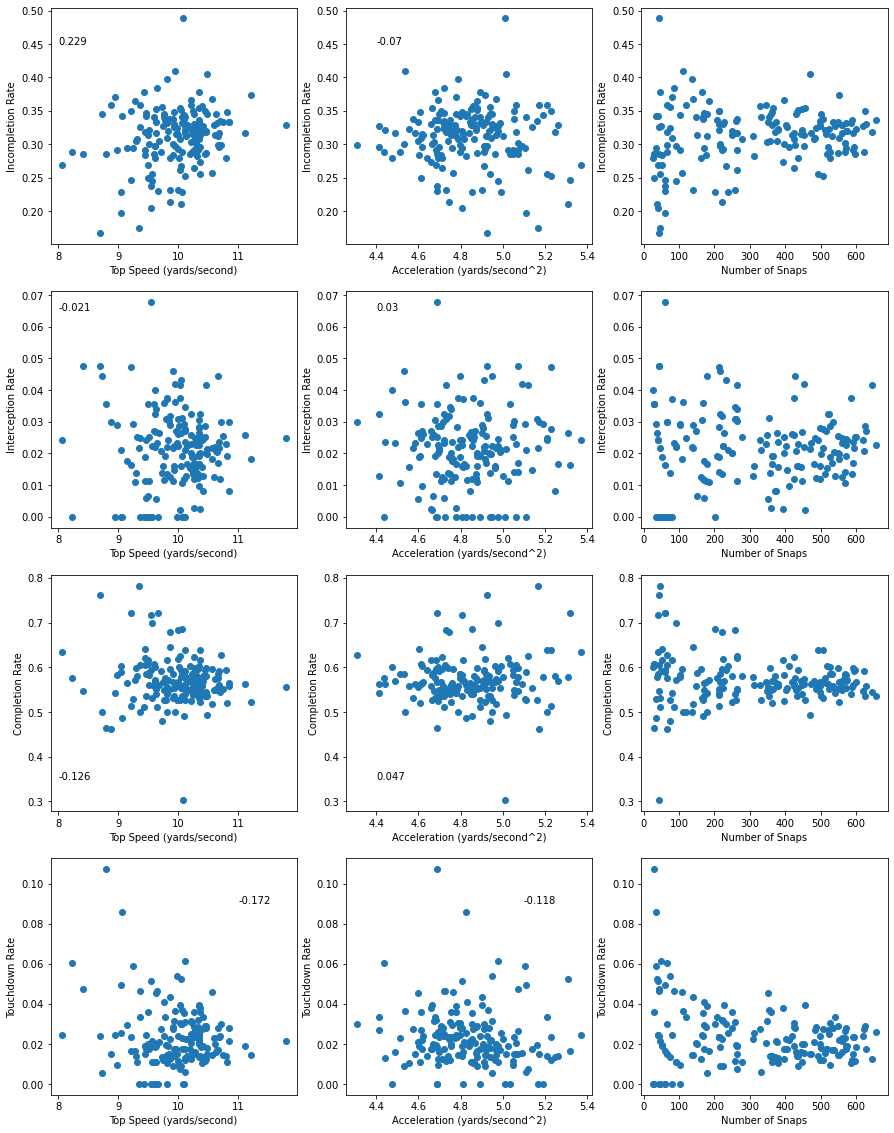

In [442]:
fig, ax = plt.subplots(4,3, figsize=(15,20))
ax[0][0].scatter(player_stats["topSpeed"], player_stats["incompRate"])
ax[0][0].set_xlabel("Top Speed (yards/second)")
ax[0][0].set_ylabel("Incompletion Rate")
#ax[0][0].annotate(player_stats["topSpeed"].astype('float64').corr(player_stats["incompRate"].astype('float64')))
ax[0][0].annotate(round(player_stats["topSpeed"].astype('float64').corr(player_stats["incompRate"].astype('float64')),3), xy=(8,.45))
ax[0][1].scatter(player_stats["accelAvg"], player_stats["incompRate"])
ax[0][1].set_xlabel("Acceleration (yards/second^2)")
ax[0][1].set_ylabel("Incompletion Rate")
ax[0][1].annotate(round(player_stats["accelAvg"].astype('float64').corr(player_stats["incompRate"].astype('float64')),3), xy=(4.4,.45))
ax[0][2].scatter(player_stats["numPlays"], player_stats["incompRate"])
ax[0][2].set_xlabel("Number of Snaps")
ax[0][2].set_ylabel("Incompletion Rate")

ax[1][0].scatter(player_stats["topSpeed"], player_stats["intRate"])
ax[1][0].set_xlabel("Top Speed (yards/second)")
ax[1][0].set_ylabel("Interception Rate")
ax[1][0].annotate(round(player_stats["topSpeed"].astype('float64').corr(player_stats["intRate"].astype('float64')),3), xy=(8,.065))
ax[1][1].scatter(player_stats["accelAvg"], player_stats["intRate"])
ax[1][1].set_xlabel("Acceleration (yards/second^2)")
ax[1][1].set_ylabel("Interception Rate")
ax[1][1].annotate(round(player_stats["accelAvg"].astype('float64').corr(player_stats["intRate"].astype('float64')),3), xy=(4.4,.065))
ax[1][2].scatter(player_stats["numPlays"], player_stats["intRate"])
ax[1][2].set_xlabel("Number of Snaps")
ax[1][2].set_ylabel("Interception Rate")

ax[2][0].scatter(player_stats["topSpeed"], player_stats["compRate"])
ax[2][0].set_xlabel("Top Speed (yards/second)")
ax[2][0].set_ylabel("Completion Rate")
ax[2][0].annotate(round(player_stats["topSpeed"].astype('float64').corr(player_stats["compRate"].astype('float64')),3), xy=(8,.35))
ax[2][1].scatter(player_stats["accelAvg"], player_stats["compRate"])
ax[2][1].set_xlabel("Acceleration (yards/second^2)")
ax[2][1].set_ylabel("Completion Rate")
ax[2][1].annotate(round(player_stats["accelAvg"].astype('float64').corr(player_stats["compRate"].astype('float64')),3), xy=(4.4,.35))
ax[2][2].scatter(player_stats["numPlays"], player_stats["compRate"])
ax[2][2].set_xlabel("Number of Snaps")
ax[2][2].set_ylabel("Completion Rate")

ax[3][0].scatter(player_stats["topSpeed"], player_stats["tdRate"])
ax[3][0].set_xlabel("Top Speed (yards/second)")
ax[3][0].set_ylabel("Touchdown Rate")
ax[3][0].annotate(round(player_stats["topSpeed"].astype('float64').corr(player_stats["tdRate"].astype('float64')),3), xy=(11,.09))
ax[3][1].scatter(player_stats["accelAvg"], player_stats["tdRate"])
ax[3][1].set_xlabel("Acceleration (yards/second^2)")
ax[3][1].set_ylabel("Touchdown Rate")
ax[3][1].annotate(round(player_stats["accelAvg"].astype('float64').corr(player_stats["tdRate"].astype('float64')),3), xy=(5.1,.09))
ax[3][2].scatter(player_stats["numPlays"], player_stats["tdRate"])
ax[3][2].set_xlabel("Number of Snaps")
ax[3][2].set_ylabel("Touchdown Rate")

In [424]:
player_stats.sort_values("numPlays", ascending=True)

,displayName,nflId,numPlays,incompRate,intRate,compRate,tdRate,topSpeed,accelAvg
113,Blidi Wreh-Wilson,2.53922e+06,25,0.28,0.04,0.6,0,9.62,4.47765
78,Marcus Cooper,2.5412e+06,28,0.285714,0.0357143,0.464286,0.107143,8.79,4.69039
166,Jalen Davis,2.56132e+06,28,0.25,0.0357143,0.607143,0.0357143,9.5,4.61096
144,Quenton Meeks,2.56081e+06,28,0.285714,0.0357143,0.607143,0,9.59,5.03307
65,Rudy Ford,2.55817e+06,34,0.294118,0.0294118,0.529412,0.0588235,9.24,5.10629
114,Corn Elder,2.55817e+06,35,0.342857,0,0.485714,0.0857143,9.07,4.82655
139,Chris Milton,2.55639e+06,38,0.210526,0.0263158,0.578947,0.0526316,10.04,5.31
8,Vernon Hargreaves,2.5553e+06,39,0.205128,0,0.717949,0.0512821,9.55,4.80445
6,Deante Burton,2.55911e+06,41,0.268293,0.0243902,0.634146,0.0243902,8.06,5.36954
32,Kevin Johnson,2.55226e+06,41,0.341463,0.0243902,0.585366,0.0243902,9.47,4.79587


In [468]:
## See if plays are continuous
wk1 = pd.read_csv("nfl-big-data-bowl-2021/week1.csv")
gameid = wk1["gameId"].unique()[0]
falcons_v_eagles = wk1[wk1["gameId"] == gameid]
for playid in falcons_v_eagles["playId"].unique():
    play = falcons_v_eagles[falcons_v_eagles["playId"] == playid]
    frame1 = play[play["frameId"] == 1]
    football_start = frame1[frame1["displayName"] == "Football"]
    football_start_yd = football_start["x"][0]
    
    lastframe = play[play["frameId"] == max(play["frameId"].unique())]
    football_end = lastframe[lastframe["displayName"] == "Football"]
    football_end_yd = football_end["x"][0]
    
    print(frame1[frame1["position"] == "QB"]["displayName"][0])
    print("Line of Scrimmage:", int(football_start_yd))
    events = play["event"].unique()
    for i in range(len(events)):
        print("    ", events[i])
    print("End Yard")

75
146
168
190
256
320
344
402
492
521
545
636
752
776
839
889
949
992
1037
1061
1085
1202
1226
1295
1344
1423
1473
1546
1568
1628
1680
1715
1750
1779
1801
1869
1894
1916
1940
2055
2094
2116
2260
2305
2360
2382
2450
2474
2503
2575
2624
2648
2693
2736
2764
2811
2980
3004
3066
3095
3181
3203
3257
3279
3392
3481
3507
3626
3678
3791
3815
3844
3904
3928
3950
3979
4142
4166
4207
4239
4258
4282
4306
4325
4366
4395
4417
4439
4472
